Dataco is an Ecommerce platform selling sporting goods and accessories across the world. 
E-commerce goods Late delivery risk identification by predicting fastest and normal Shipping Durations. The machine learning  models built by us, will enable E-commerce and Goods/products delivery industries to identify the 'risk of late delivery' and predict the fastest and normal duration of goods shipment for their Inland and foreign clients/ customers/buyers.

This is the dataset of Supply Chains used by the company DataaCo Global which includes a collection of their products sold, finacial details(profit, loss, total sales etc.), Shipping details, and customer details such as sales, demographics, and transaction details. The data spans to 91 MB engulfing details of 180,520 customers spanning to 53 columns related to Clothing , Sports,and Electronic Supplies.

It represents the sale of sporting goods across the world in different regions such as Africa, Europe, LATAM, US and Asia. 
The data represents the time period for 4years ie, 2015 to 2018.

Data Dictionary: Fields	Description
Type	:  Type of transaction made
Days for shipping (real)     	:  Actual shipping days of the purchased product
Days for shipment (scheduled)	:  Days of scheduled delivery of the purchased product
Benefit per order	:  Earnings per order placed
Sales per customer	:  Total sales per order made per customer
Delivery Status	:  Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time
Late_delivery_risk           	:  Categorical variable that indicates if sending is late           (1), it is not late (0).
Category Id	:  Product category code
Category Name	:  Description of the product category
Customer City	:  City where the customer made the purchase
Customer Country	:  Country where the customer made the purchase
Customer Email	:  Customer's email
Customer Fname	:  Customer name
Customer Id	:  Customer ID
Customer Lname	:  Customer lastname
Customer Password	:  Masked customer key
Customer Segment	:  Types of Customers: Consumer , Corporate , Home Office
Customer State	:  State to which the store where the purchase is registered belongs
Customer Street	:  Street to which the store where the purchase is registered belongs
Customer Zipcode	:  Customer Zipcode
Department Id	:  Department code of store
Department Name	:  Department name of store
Latitude	:  Latitude corresponding to location of store
Longitude	:  Longitude corresponding to location of store
Market	:  Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA
Order City	:  Destination city of the order
Order Country	:  Destination country of the order
Order Customer Id	:  Customer order code
order date (DateOrders)	:  Date on which the order is made
Order Id	:  Order code
Order Item Cardprod Id	:  Product code generated through the RFID reader
Order Item Discount	:  Order item discount value
Order Item Discount Rate     	:  Order item discount percentage
Order Item Id	:  Order item code
Order Item Product Price     	:  Price of products without discount
Order Item Profit Ratio	:  Order Item Profit Ratio
Order Item Quantity	:  Number of products per order
Sales	:  Value in sales
Order Item Total  	:  Total amount per order
Order Profit Per Order	:  Order Profit Per Order
Order Region	:  Region of the world where the order is delivered :  Southeast Asia ,South Asia ,Oceania ,Eastern Asia, West Asia , West of USA , US Center , West Africa, Central Africa ,North Africa ,Western Europe ,Northern , Caribbean , South America ,East Africa ,Southern Europe , East of USA ,Canada ,Southern Africa , Central Asia ,  Europe , Central America, Eastern Europe , South of  USA 
Order State	:  State of the region where the order is delivered
Order Status	:  Order Status : COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FRAUD ,ON_HOLD ,PAYMENT_REVIEW
Product Card Id	:  Product code
Product Category Id	:  Product category code
Product Description	:  Product Description
Product Image	:  Link of visit and purchase of the product
Product Name	:  Product Name
Product Price	:  Product Price
Product Status	:  Status of the product stock :If it is 1 not available , 0 the product is available 
Shipping date (DateOrders)   	:  Exact date and time of shipment
Shipping Mode	:  The following shipping modes are presented : Standard Class , First Class , Second Class , Same Day

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error,mean_absolute_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet,LogisticRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from statsmodels.api import OLS
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [3]:
df = pd.read_csv('DataCoSupplyChainDataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

## Data Cleaning 

In [5]:
del_cols= ['Category Id',
'Customer Email',
'Customer Fname', 
'Customer Id', 
'Customer Lname',
'Customer Password',
'Customer Street',
'Department Id',
'Order Customer Id',
'Order Id', 
'Order Item Cardprod Id',
'Product Card Id',
'Order Item Id',
'Product Card Id', 
'Product Category Id', 
'Product Description', 
'Product Image']

In [6]:
dfn = df.drop(columns=del_cols, axis =1)

In [7]:
dfn.shape

(180519, 37)

In [8]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Name                  180519 non-null  object 
 8   Customer City                  180519 non-null  object 
 9   Customer Country               180519 non-null  object 
 10  Customer Segment               180519 non-null  object 
 11  Customer State                 180519 non-null  object 
 12  Customer Zipcode              

In [9]:
dfn.duplicated().sum()

0

# Data Understanding

## Numerical Data

In [10]:
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
Latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933
Longitude,180519.0,-84.915675,21.433241,-158.025986,-98.446312,-76.847908,-66.370583,115.263077
Order Item Discount,180519.0,20.664741,21.800901,0.000000,5.400000,14.000000,29.990000,500.000000
Order Item Discount Rate,180519.0,0.101668,0.070415,0.000000,0.040000,0.100000,0.160000,0.250000


In [11]:
del_col1 = ['Product Status','Order Profit Per Order','Order Item Product Price','Order Item Total']

In [12]:
dfn = dfn.drop(columns=del_col1,axis = 1)

In [13]:
dfn.shape

(180519, 33)

## Categorical data

In [14]:
dfn.describe(include='object').T

,count,unique,top,freq
Type,180519,4,DEBIT,69295
Delivery Status,180519,4,Late delivery,98977
Category Name,180519,50,Cleats,24551
Customer City,180519,563,Caguas,66770
Customer Country,180519,2,EE. UU.,111146
Customer Segment,180519,3,Consumer,93504
Customer State,180519,46,PR,69373
Department Name,180519,11,Fan Shop,66861
Market,180519,5,LATAM,51594
Order City,180519,3597,Santo Domingo,2211


Insgihts from this:
the most selling product name:
the highest business coming from (segment):
the highest business coming from (Market):
the highest business coming from (Category):

In [15]:
dfn.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Order Zipcode,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,13.110000,0.04,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,NaN,Smart watch,327.75,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,1/13/2018 12:27,16.389999,0.05,-0.80,1,327.75,South Asia,Rajastán,PENDING,NaN,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,1/13/2018 12:06,18.030001,0.06,-0.80,1,327.75,South Asia,Rajastán,CLOSED,NaN,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,1/13/2018 11:45,22.940001,0.07,0.08,1,327.75,Oceania,Queensland,COMPLETE,NaN,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,1/13/2018 11:24,29.500000,0.09,0.45,1,327.75,Oceania,Queensland,PENDING_PAYMENT,NaN,Smart watch,327.75,1/15/2018 11:24,Standard Class


In [16]:
# converting time data into date time format
dfn['shipping_date']=pd.to_datetime(dfn['shipping date (DateOrders)'])
dfn['order_date']=pd.to_datetime(dfn['order date (DateOrders)'])

In [33]:
dfn = dfn.drop(columns=['shipping date (DateOrders)','order date (DateOrders)'],axis = 1)

In [35]:
dfn['order_year']= pd.DatetimeIndex(dfn.order_date).year
dfn['order_month']=pd.DatetimeIndex(dfn.order_date).month
dfn['order_day']=pd.DatetimeIndex(dfn.order_date).day
dfn['order_weekday']=pd.DatetimeIndex(dfn.order_date).weekday

In [36]:
## Creating new columns with help of time stamp data:
dfn['shipping_year']= pd.DatetimeIndex(dfn.shipping_date).year
dfn['shipping_month']=pd.DatetimeIndex(dfn.shipping_date).month
dfn['shipping_day']=pd.DatetimeIndex(dfn.shipping_date).day
dfn['shipping_weekday']=pd.DatetimeIndex(dfn.shipping_date).weekday

In [37]:
dfn['days_diff'] = dfn.shipping_date-dfn.order_date

In [38]:
dfn.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Order Zipcode,Product Name,Product Price,Shipping Mode,shipping_date,order_date,order_year,order_month,order_day,order_weekday,shipping_year,shipping_month,shipping_day,shipping_weekday,days_diff
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,13.110000,0.04,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,NaN,Smart watch,327.75,Standard Class,2018-02-03 22:56:00,2018-01-31 22:56:00,2018,1,31,2,2018,2,3,5,3 days
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,16.389999,0.05,-0.80,1,327.75,South Asia,Rajastán,PENDING,NaN,Smart watch,327.75,Standard Class,2018-01-18 12:27:00,2018-01-13 12:27:00,2018,1,13,5,2018,1,18,3,5 days
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,18.030001,0.06,-0.80,1,327.75,South Asia,Rajastán,CLOSED,NaN,Smart watch,327.75,Standard Class,2018-01-17 12:06:00,2018-01-13 12:06:00,2018,1,13,5,2018,1,17,2,4 days
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,22.940001,0.07,0.08,1,327.75,Oceania,Queensland,COMPLETE,NaN,Smart watch,327.75,Standard Class,2018-01-16 11:45:00,2018-01-13 11:45:00,2018,1,13,5,2018,1,16,1,3 days
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,29.500000,0.09,0.45,1,327.75,Oceania,Queensland,PENDING_PAYMENT,NaN,Smart watch,327.75,Standard Class,2018-01-15 11:24:00,2018-01-13 11:24:00,2018,1,13,5,2018,1,15,0,2 days


In [39]:
dfn['days_diff'] = dfn['Days for shipping (real)']

In [40]:
dfn = dfn.drop(columns=['Days for shipping (real)'],axis =1)

In [41]:
dfn.head()

,Type,Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Order Zipcode,Product Name,Product Price,Shipping Mode,shipping_date,order_date,order_year,order_month,order_day,order_weekday,shipping_year,shipping_month,shipping_day,shipping_weekday,days_diff
0,DEBIT,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,13.110000,0.04,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,NaN,Smart watch,327.75,Standard Class,2018-02-03 22:56:00,2018-01-31 22:56:00,2018,1,31,2,2018,2,3,5,3
1,TRANSFER,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,16.389999,0.05,-0.80,1,327.75,South Asia,Rajastán,PENDING,NaN,Smart watch,327.75,Standard Class,2018-01-18 12:27:00,2018-01-13 12:27:00,2018,1,13,5,2018,1,18,3,5
2,CASH,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,18.030001,0.06,-0.80,1,327.75,South Asia,Rajastán,CLOSED,NaN,Smart watch,327.75,Standard Class,2018-01-17 12:06:00,2018-01-13 12:06:00,2018,1,13,5,2018,1,17,2,4
3,DEBIT,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,22.940001,0.07,0.08,1,327.75,Oceania,Queensland,COMPLETE,NaN,Smart watch,327.75,Standard Class,2018-01-16 11:45:00,2018-01-13 11:45:00,2018,1,13,5,2018,1,16,1,3
4,PAYMENT,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,29.500000,0.09,0.45,1,327.75,Oceania,Queensland,PENDING_PAYMENT,NaN,Smart watch,327.75,Standard Class,2018-01-15 11:24:00,2018-01-13 11:24:00,2018,1,13,5,2018,1,15,0,2


# Missing value analysis 

In [44]:
dfn.isnull().sum()*100/len(dfn)

Type                             0.0
Days for shipment (scheduled)    0.0
Benefit per order                0.0
Sales per customer               0.0
Delivery Status                  0.0
Late_delivery_risk               0.0
Category Name                    0.0
Customer City                    0.0
Customer Country                 0.0
Customer Segment                 0.0
Customer State                   0.0
Department Name                  0.0
Latitude                         0.0
Longitude                        0.0
Market                           0.0
Order City                       0.0
Order Country                    0.0
Order Item Discount              0.0
Order Item Discount Rate         0.0
Order Item Profit Ratio          0.0
Order Item Quantity              0.0
Sales                            0.0
Order Region                     0.0
Order State                      0.0
Order Status                     0.0
Product Name                     0.0
Product Price                    0.0
S

In [43]:
dfn = dfn.drop(columns=['Customer Zipcode','Order Zipcode'],axis =1)

In [46]:
dfn.shape

(180519, 39)

# Univarite Analysis 

In [48]:
num_cols = dfn.select_dtypes(exclude='object').columns
cat_cols = dfn.select_dtypes(include='object').columns

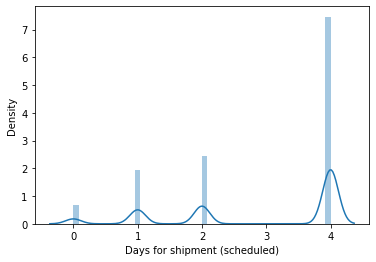

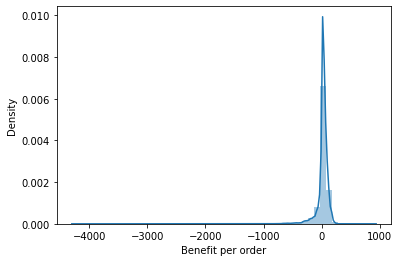

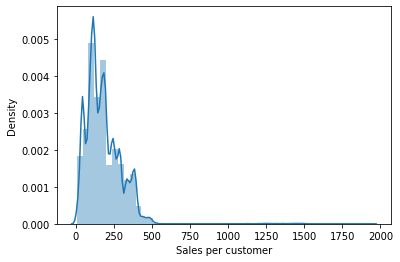

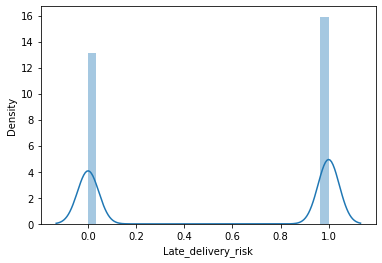

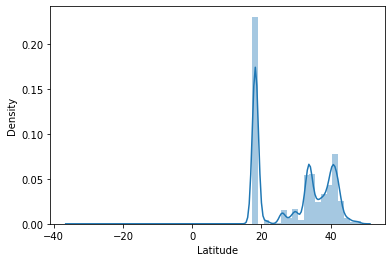

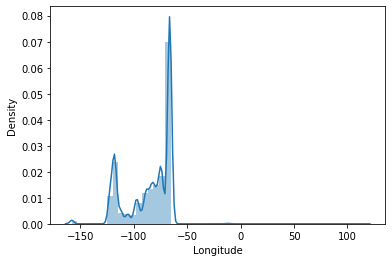

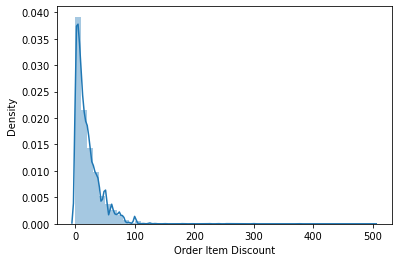

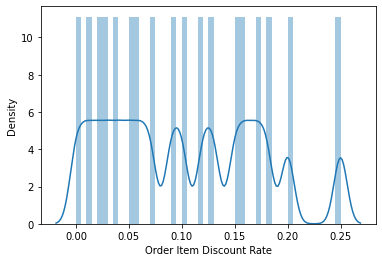

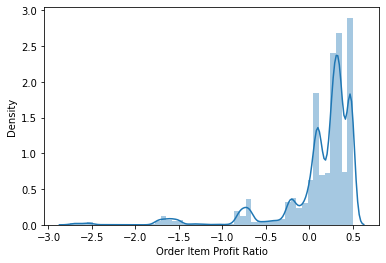

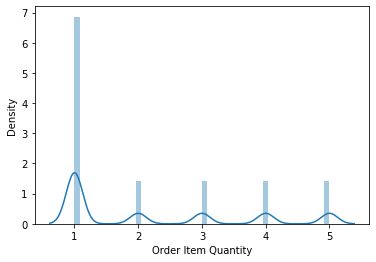

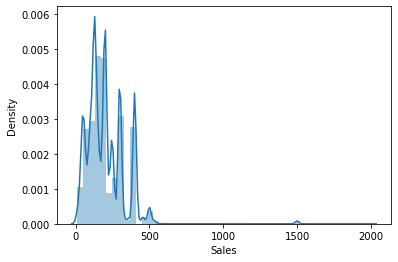

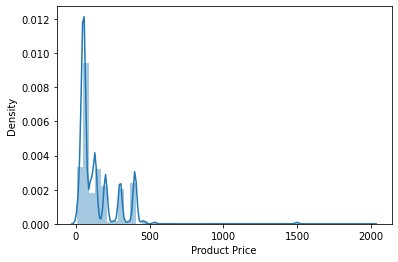

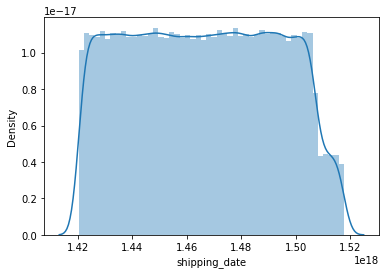

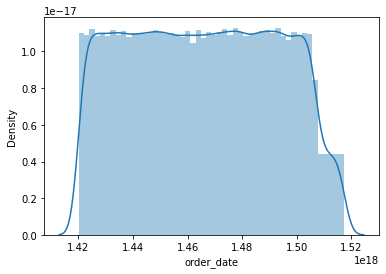

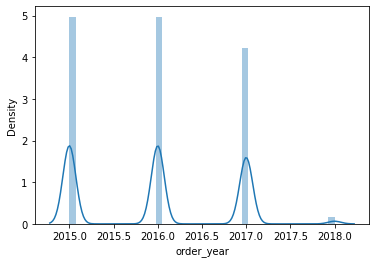

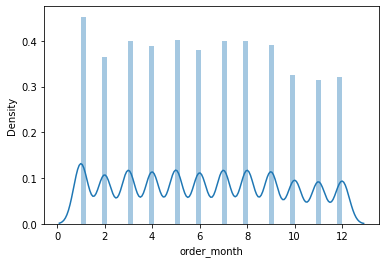

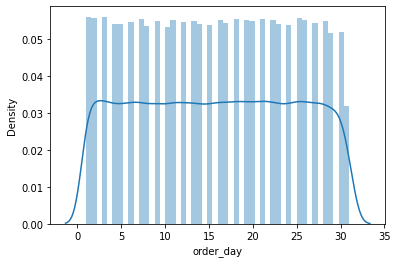

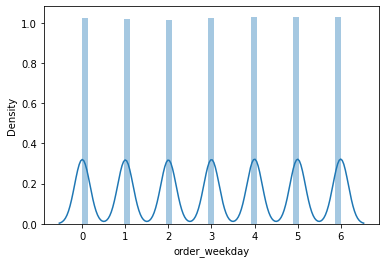

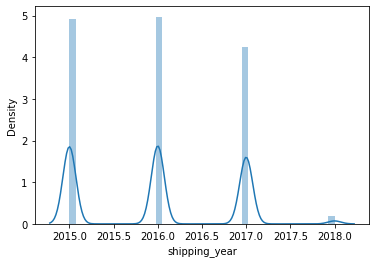

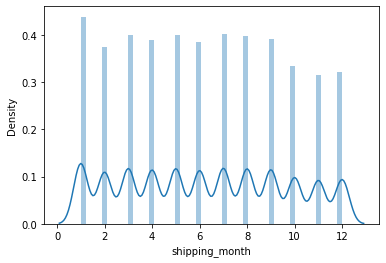

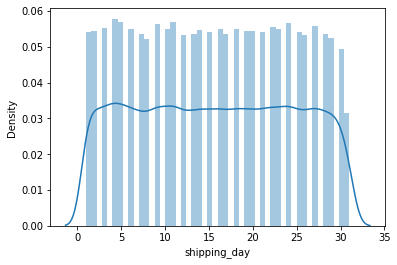

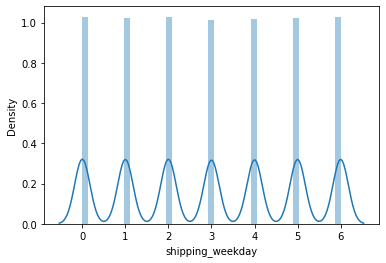

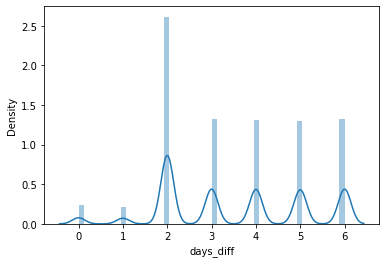

In [49]:
## Histogram and Density plots for all numerical data:
for i in num_cols:
    sns.distplot(dfn[i])
    plt.show()

In [ ]:
## boxplotplots for all numerical data:
for i in num_cols:
    sns.boxplot(dfn[i])
    plt.show()

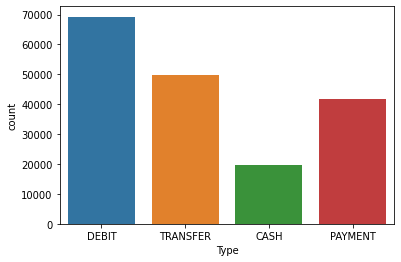

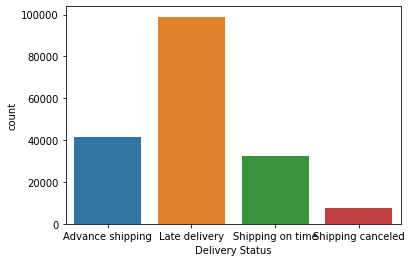

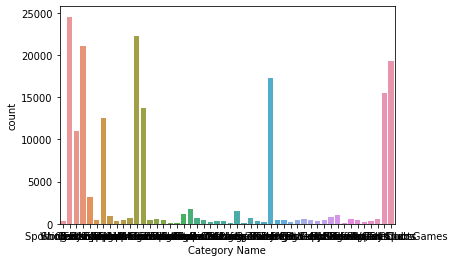

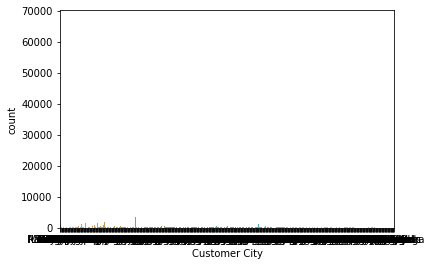

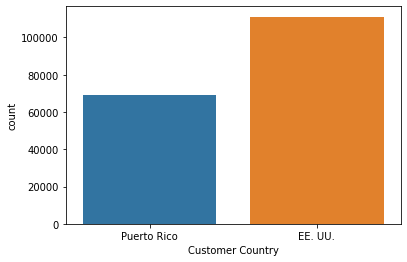

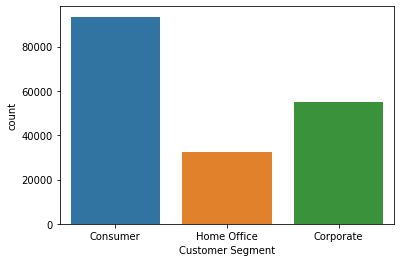

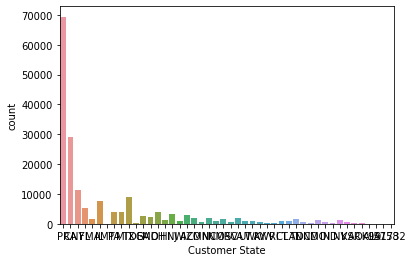

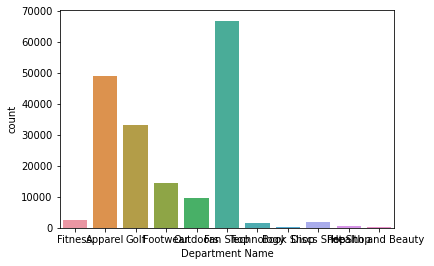

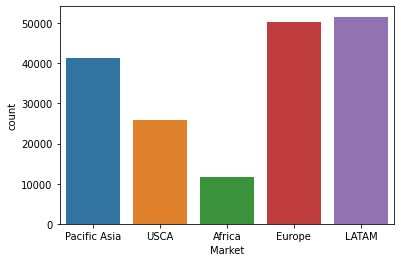

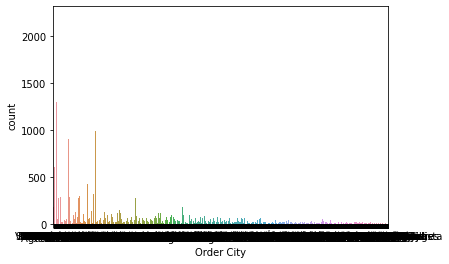

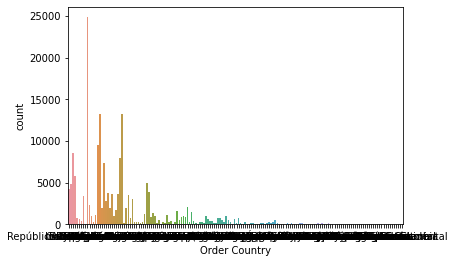

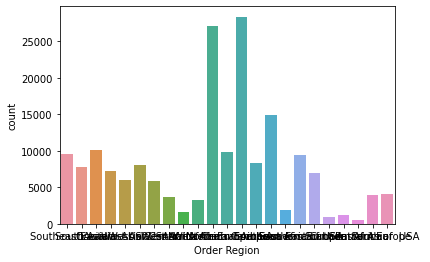

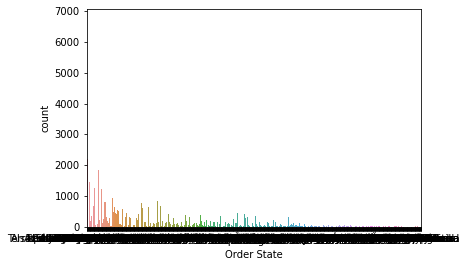

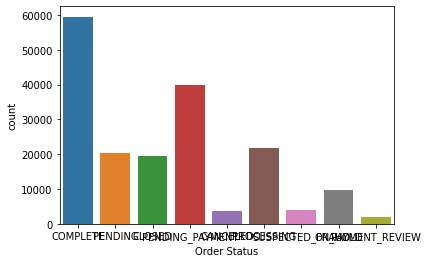

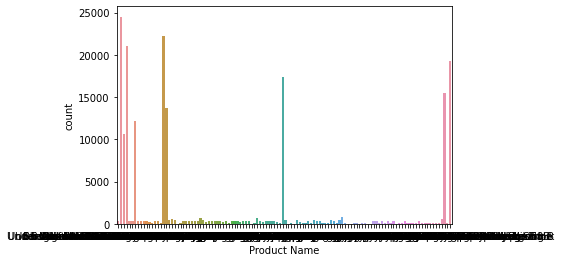

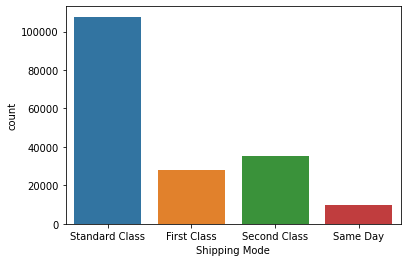

In [50]:
## Histogram and Density plots for all numerical data:
for i in cat_cols:
    sns.countplot(dfn[i])
    plt.show()

# Bivariate Analysis 

In [51]:
dfn.corr()

,Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Product Price,order_year,order_month,order_day,order_weekday,shipping_year,shipping_month,shipping_day,shipping_weekday,days_diff
Days for shipment (scheduled),1.000000,-0.000185,0.006445,-0.369352,-0.005300,0.003675,0.002897,0.000065,-0.001822,-0.002925,0.006327,0.006912,0.000656,-0.007458,-0.000849,-0.004602,0.003176,-0.006171,-0.008115,0.003089,0.515880
Benefit per order,-0.000185,1.000000,0.133484,-0.003727,0.000338,-0.002521,0.064756,-0.018644,0.823689,0.015696,0.131816,0.103459,0.010703,0.009064,0.003491,0.000228,0.010567,0.009361,0.002701,0.003789,-0.005101
Sales per customer,0.006445,0.133484,1.000000,-0.003791,-0.000223,0.001444,0.498734,-0.119469,-0.001439,0.105413,0.989744,0.781781,0.059581,0.056917,0.035593,0.007687,0.060635,0.055813,0.006611,-0.002860,0.001757
Late_delivery_risk,-0.369352,-0.003727,-0.003791,1.000000,0.000679,-0.001915,-0.000750,0.000404,-0.002316,-0.000139,-0.003564,-0.002175,-0.002181,0.002587,-0.002028,0.001121,-0.000448,0.003688,-0.000386,0.000733,0.401415
Latitude,-0.005300,0.000338,-0.000223,0.000679,1.000000,-0.525122,-0.002997,-0.003889,-0.000081,-0.001853,-0.000696,0.000471,-0.001759,-0.004335,0.006954,-0.007933,-0.001496,-0.004447,-0.001672,0.003789,-0.004073
Longitude,0.003675,-0.002521,0.001444,-0.001915,-0.525122,1.000000,0.002343,0.000526,-0.003582,0.004467,0.001696,-0.000894,0.001800,0.002976,-0.007870,0.003096,0.001468,0.003482,-0.001754,-0.010819,0.003911
Order Item Discount,0.002897,0.064756,0.498734,-0.000750,-0.002997,0.002343,1.000000,0.659955,-0.002788,0.065379,0.617438,0.488101,0.037148,0.035674,0.024528,0.003550,0.037898,0.034991,0.003451,-0.000029,0.002231
Order Item Discount Rate,0.000065,-0.018644,-0.119469,0.000404,-0.003889,0.000526,0.659955,1.000000,-0.002691,-0.000028,0.000346,0.000345,0.000078,0.001107,0.001248,0.002027,0.000149,0.001026,0.000028,0.002245,0.001467
Order Item Profit Ratio,-0.001822,0.823689,-0.001439,-0.002316,-0.000081,-0.003582,-0.002788,-0.002691,1.000000,0.001128,-0.001766,-0.002043,0.002184,0.001927,-0.001671,-0.002280,0.002105,0.001959,-0.000420,0.004859,-0.004638
Order Item Quantity,-0.002925,0.015696,0.105413,-0.000139,-0.001853,0.004467,0.065379,-0.000028,0.001128,1.000000,0.106442,-0.476232,-0.078252,-0.029235,0.000108,0.002229,-0.079215,-0.025938,0.002318,-0.001355,-0.000811


In [55]:
# sns.pairplot(dfn)

<AxesSubplot:>

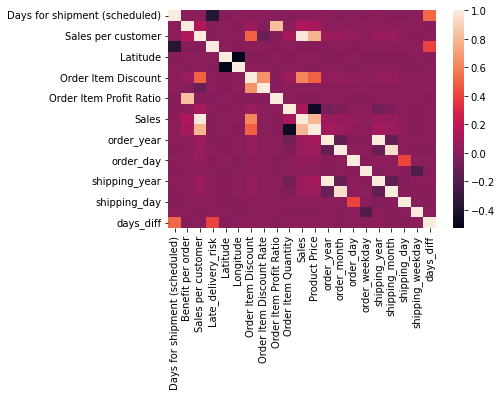

In [57]:
sns.heatmap(dfn.corr())

In [ ]:
df_geo=dfn.groupby([ 'Order_Country'])['Sales'].sum().reset_index(name='Sales').sort_values(by= 'Sales', ascending= False)
fig = px.choropleth(df_geo ,  locationmode='country names', locations='Order_Country',
                    color='Sales', hover_name='Order_Country', color_continuous_scale=px.colors.sequential.Plasma)
fig.show()